<Figure size 800x600 with 0 Axes>

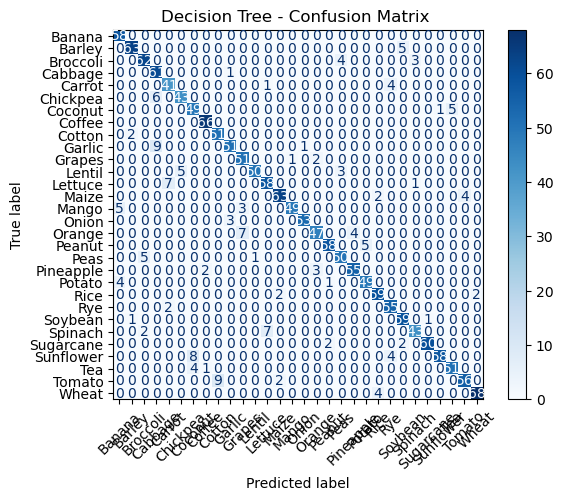

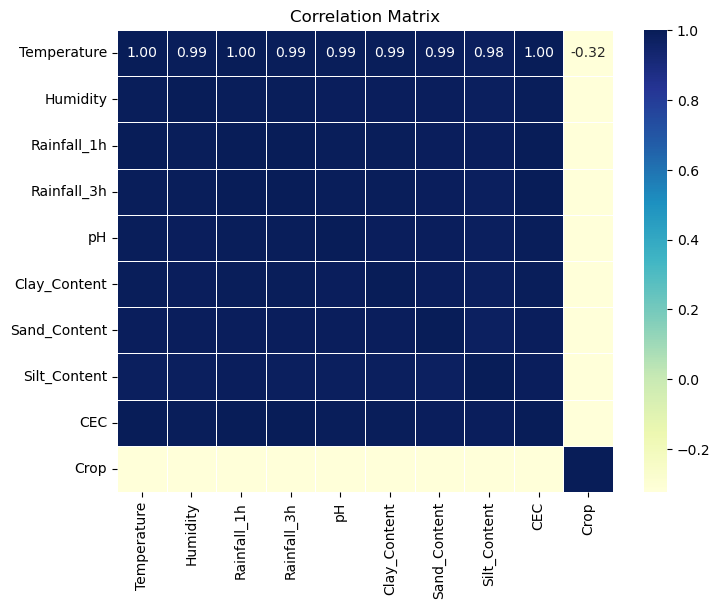

Decision Tree Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

      Banana       0.87      1.00      0.93        58
      Barley       0.95      0.93      0.94        68
    Broccoli       0.90      0.90      0.90        69
     Cabbage       0.80      0.98      0.88        62
      Carrot       0.82      0.89      0.85        46
    Chickpea       0.90      0.88      0.89        49
     Coconut       0.80      0.89      0.84        55
      Coffee       0.96      1.00      0.98        66
      Cotton       0.85      0.96      0.90        53
      Garlic       0.93      0.84      0.88        61
      Grapes       0.84      0.94      0.89        54
      Lentil       0.98      0.86      0.92        58
     Lettuce       0.88      0.88      0.88        66
       Maize       0.94      0.91      0.93        69
       Mango       0.98      0.86      0.92        57
       Onion       0.98      0.95      0.96        56
      Orange       0.90      

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/ganeshreddy/Downloads/dataset.csv'
crop_data = pd.read_csv(file_path)

# Encode the 'Crop' column to numerical values
crop_data['Crop'] = crop_data['Crop'].astype('category')
crop_labels = crop_data['Crop'].cat.categories.tolist()
crop_data['Crop'] = crop_data['Crop'].cat.codes

# Define features and target
X = crop_data.drop('Crop', axis=1)
y = crop_data['Crop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Decision Tree model with optimized hyperparameters to improve accuracy
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=4, min_samples_leaf=2)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=crop_labels, zero_division=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix with crop names
plt.figure(figsize=(8, 6))
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=crop_labels)
conf_matrix_display.plot(cmap='Blues', xticks_rotation=45)
plt.title('Decision Tree - Confusion Matrix ')
plt.show()

# Enhance the correlation matrix color format
plt.figure(figsize=(8, 6))
sns.heatmap(crop_data.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Print the actual accuracy and classification report
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
